# 📊 Análisis Exploratorio de Datos (EDA)
## Player Similarity Finder - Big 5 European Leagues (2024/2025)

---

### 🎯 Objetivo del Notebook

Profundizar en la estructura y calidad del dataset de jugadores usando estadísticas avanzadas de las 5 grandes ligas europeas. El objetivo es preparar datos limpios y entendibles para análisis de clusters, recomendación y visualizaciones.

---

### 📚 Contexto y Procedencia

Fuente: **FBref.com** (temporada 2024/2025)
- 🇬🇧 Premier League
- 🇪🇸 La Liga
- 🇩🇪 Bundesliga
- 🇮🇹 Serie A
- 🇫🇷 Ligue 1

---

In [3]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


---

## 🚦 Ajuste inicial: limpieza avanzada de columnas

Los archivos descargados de FBref tienen formato multiheader, por lo que es imprescindible:
- Saltarse la primera fila (nombres de columnas multi-nivel)
- Renombrar correctamente cada columna según el glosario
- Eliminar posibles filas duplicadas de headers

Realizamos el ajuste a continuación:

---

In [4]:
# Ruta archivo (ajusta si lo mueves)
data_path = "../data/raw/big5_leagues_2024_2025_stats.csv"

# Saltar la primera fila para quedarse con el header real
df_clean = pd.read_csv(data_path, skiprows=1)

# Nombres correctos según glosario (ver Glosario-1.md)
column_names = [
    'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
    'MP', 'Starts', 'Min', '90s',
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
    'xG', 'npxG', 'xAG', 'npxG+xAG',
    'PrgC', 'PrgP', 'PrgR',
    'Gls_per90', 'Ast_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90',
    'xG_per90', 'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90',
    'Matches'
]
df_clean.columns = column_names

# Eliminar posibles filas de header repetido
df_clean = df_clean[df_clean['Player'] != 'Player'].reset_index(drop=True)

# Eliminar columnas innecesarias
df_clean = df_clean.drop(columns=['Rk', 'Matches'])

print(f"✅ Dimensiones tras limpieza: {df_clean.shape}")
df_clean.head()

✅ Dimensiones tras limpieza: (2854, 36)


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_per90,Ast_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24,2000,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0,6,10,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02
2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21,2003,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,2,3,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10
3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20,2004,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,4,1,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06
4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18,2006,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


---

### ✅ Dataset limpio, sin columnas innecesarias

A partir de aquí, **se usa siempre `df_clean`** como DataFrame base para análisis, sin 'Rank' ni 'Matches'.

---

In [5]:
print("🏷️ Información general tras limpieza")
df_clean.info()
print(f"\nJugadores únicos: {df_clean['Player'].nunique()}")
print(f"Equipos: {df_clean['Squad'].nunique()}")
print(f"Ligas: {df_clean['Comp'].nunique()}")

🏷️ Información general tras limpieza
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Player          2854 non-null   object
 1   Nation          2848 non-null   object
 2   Pos             2854 non-null   object
 3   Squad           2854 non-null   object
 4   Comp            2854 non-null   object
 5   Age             2850 non-null   object
 6   Born            2850 non-null   object
 7   MP              2854 non-null   object
 8   Starts          2854 non-null   object
 9   Min             2854 non-null   object
 10  90s             2854 non-null   object
 11  Gls             2854 non-null   object
 12  Ast             2854 non-null   object
 13  G+A             2854 non-null   object
 14  G-PK            2854 non-null   object
 15  PK              2854 non-null   object
 16  PKatt           2854 non-null   object
 17  CrdY           

---

## 🔎 Revisión de nulos y calidad de datos

Revisamos ahora proporción y ubicación de valores nulos reales.

---


In [6]:
null_counts = df_clean.isnull().sum()
null_percentages = (null_counts / len(df_clean)) * 100

null_summary = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje (%)': null_percentages.values
})

null_summary = null_summary[null_summary['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(null_summary) > 0:
    print("\n⚠️  Columnas con valores nulos detectados:")
    print(null_summary.to_string(index=False))
else:
    print("\n✅ No se detectaron valores nulos en el dataset")


⚠️  Columnas con valores nulos detectados:
Columna  Valores Nulos  Porcentaje (%)
 Nation              6            0.21
    Age              4            0.14
   Born              4            0.14


---

## 📁 Detección de registros duplicados

Comprobamos si hay filas duplicadas exactas, y si existen jugadores con más de un registro por aparecer en distintos equipos/ligas o con múltiples posiciones.

---

In [8]:
print("\n" + "=" * 80)
print("DETECCIÓN DE REGISTROS DUPLICADOS Y TRANSFERENCIAS REALES")
print("=" * 80)

# 1. Duplicados exactos (mismo jugador, mismo equipo, misma liga y mismos minutos)
duplicates_exact = df_clean.duplicated(subset=['Player', 'Squad', 'Comp', 'Min'], keep=False)
exact_count = duplicates_exact.sum()
print(f"🔁 Duplicados exactos (posibles errores): {exact_count}")

if exact_count > 0:
    print("\n📋 Ejemplos de duplicados exactos:")
    print(df_clean[duplicates_exact][['Player', 'Squad', 'Comp', 'Min']].head(5))
else:
    print("✅ No hay filas duplicadas idénticas en todas sus columnas clave.")


# 2. Mismo jugador en más de un registro (indica transferencia o cesión)
duplicates_player = df_clean[df_clean.duplicated(subset=['Player'], keep=False)]
unique_players = duplicates_player['Player'].nunique()

print(f"\n🚨 Jugadores con más de un registro detectados: {unique_players}")
print("(Esto normalmente indica que el jugador jugó en varios equipos o ligas en la misma temporada.)")

# Mostrar casos claros de transferencia: mismo jugador, distinto equipo
transfer_cases = duplicates_player.sort_values(['Player', 'Comp', 'Squad'])
transfer_summary = (
    transfer_cases.groupby('Player')[['Squad', 'Comp']].agg(lambda x: list(sorted(set(x)))).reset_index()
)
transfer_summary = transfer_summary[transfer_summary['Squad'].apply(len) > 1]

print(f"\n⚽ Transferencias reales detectadas: {transfer_summary.shape[0]}")
print("Ejemplo de jugadores transferidos en 2024/2025:")
print(transfer_summary.head(10).to_string(index=False))


DETECCIÓN DE REGISTROS DUPLICADOS Y TRANSFERENCIAS REALES
🔁 Duplicados exactos (posibles errores): 0
✅ No hay filas duplicadas idénticas en todas sus columnas clave.

🚨 Jugadores con más de un registro detectados: 152
(Esto normalmente indica que el jugador jugó en varios equipos o ligas en la misma temporada.)

⚽ Transferencias reales detectadas: 152
Ejemplo de jugadores transferidos en 2024/2025:
                Player                       Squad                             Comp
    Abdukodir Khusanov     [Lens, Manchester City] [eng Premier League, fr Ligue 1]
      Abdulai Juma Bah          [Lens, Valladolid]         [es La Liga, fr Ligue 1]
            Adam Aznou [Bayern Munich, Valladolid]      [de Bundesliga, es La Liga]
            Akor Adams      [Montpellier, Sevilla]         [es La Liga, fr Ligue 1]
       Albert Grønbaek       [Rennes, Southampton] [eng Premier League, fr Ligue 1]
     Alessandro Bianco         [Fiorentina, Monza]                     [it Serie A]
Alessandr

---

## 🧩 Consolidación de jugadores para modelado (Clustering)

Algunos futbolistas aparecen en varios registros en la temporada (por transferencias, cesiones o cambios de liga).
Para garantizar que cada jugador tenga un vector único en el análisis de similitud y clustering, crearemos una versión **consolidada**:

- Se agrupan los registros por jugador.
- Se hace la media ponderada de variables numéricas según minutos jugados (`Min`).
- Se conserva información descriptiva general (nación, posición, última competición).

---

In [9]:
# Variables numéricas a consolidar para clustering
stats_columns = [
    'Min', '90s', 'Age',
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
    'xG', 'npxG', 'xAG', 'npxG+xAG',
    'PrgC', 'PrgP', 'PrgR',
    'Gls_per90', 'Ast_per90', 'G+A_per90',
    'xG_per90', 'xAG_per90', 'xG+xAG_per90',
    'npxG_per90', 'npxG+xAG_per90'
]

# Convertimos a numérico de forma segura
for col in stats_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Agrupación ponderada por minutos jugados
def weighted_mean(x):
    return np.average(x, weights=df_clean.loc[x.index, 'Min']) if x.notna().sum() > 0 else np.nan

df_cluster = (
    df_clean.groupby('Player')
    .agg({
        **{col: weighted_mean for col in stats_columns},
        # Atributos descriptivos (último equipo, posición y competición)
        'Nation': 'first',
        'Pos': 'first',
        'Comp': 'last',
        'Squad': 'last'
    })
    .reset_index()
)

# Asegurar correcta conversión numérica final
df_cluster[stats_columns] = df_cluster[stats_columns].apply(pd.to_numeric, errors='coerce')

print(f"✅ Dataset consolidado para clustering creado: {df_cluster.shape}")
print(f"Jugadores únicos: {df_cluster['Player'].nunique()}")
df_cluster.head(10)

✅ Dataset consolidado para clustering creado: (2702, 31)
Jugadores únicos: 2702


,Player,Min,90s,Age,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_per90,Ast_per90,G+A_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Nation,Pos,Comp,Squad
0,Aaron Ciammaglichella,1.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,it ITA,MF,it Serie A,Torino
1,Aaron Cresswell,824.00,9.20,34.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.20,0.20,1.30,1.60,6.00,36.00,4.00,0.00,0.00,0.00,0.03,0.15,0.17,0.03,0.17,eng ENG,DF,eng Premier League,West Ham
2,Aaron Malouda,2.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,fr FRA,FW,fr Ligue 1,Lille
3,Aaron Ramsdale,2700.00,30.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,eng ENG,GK,eng Premier League,Southampton
4,Aaron Wan-Bissaka,3154.00,35.00,26.00,2.00,5.00,7.00,2.00,0.00,0.00,1.00,0.00,1.20,1.20,3.50,4.70,110.00,149.00,167.00,0.06,0.14,0.20,0.03,0.10,0.14,0.03,0.14,cd COD,DF,eng Premier League,West Ham
5,Aarón Martín,3085.00,34.30,27.00,0.00,8.00,8.00,0.00,0.00,0.00,5.00,0.00,0.90,0.90,5.50,6.40,50.00,90.00,108.00,0.00,0.23,0.23,0.03,0.16,0.19,0.03,0.19,es ESP,DF,it Serie A,Genoa
6,Abakar Sylla,950.00,10.60,21.00,1.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,0.40,0.40,0.10,0.50,0.00,21.00,3.00,0.09,0.00,0.09,0.04,0.01,0.05,0.04,0.05,ci CIV,DF,fr Ligue 1,Strasbourg
7,Abdallah Sima,1238.00,13.80,23.00,7.00,2.00,9.00,7.00,0.00,0.00,2.00,0.00,5.90,5.90,1.00,6.90,36.00,24.00,92.00,0.51,0.15,0.65,0.43,0.07,0.50,0.43,0.50,sn SEN,"FW,MF",fr Ligue 1,Brest
8,Abde Ezzalzouli,1984.00,22.00,22.00,2.00,2.00,4.00,2.00,0.00,1.00,2.00,0.00,8.00,7.20,2.00,9.30,117.00,68.00,215.00,0.09,0.09,0.18,0.36,0.09,0.46,0.33,0.42,ma MAR,"FW,MF",es La Liga,Betis
9,Abde Rebbach,385.00,4.30,25.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.20,0.20,0.30,0.50,16.00,5.00,34.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11,dz ALG,"FW,MF",es La Liga,Alavés


---

### ✅ Dataset consolidado correcto

- Cada jugador aparece **una sola vez**.
- Se conservaron estadísticas promedio ponderadas por minutos jugados.
- Ideal para aplicar técnicas de **K-Means**, **DBSCAN** y modelos de similitud con **KNN**.

Este nuevo `df_cluster` será la base de:
- **Clustering no supervisado** (detección de estilos de juego)
- **Sistemas de recomendación** (jugadores similares)

---

---

## 🌍 Limpieza de abreviaturas en Nation y Comp

FBref concatena códigos duplicados en las columnas **Nation** (ejemplo: `eng ENG`)
y **Comp** (ejemplo: `eng Premier League`).
Vamos a quedarnos solo con los nombres legibles.

---

In [10]:
# --- Limpieza de códigos duplicados en 'Nation' y 'Comp' (ajustada y robusta) ---

# 1. En 'Nation': quedarnos con el código de tres letras (último grupo en mayúsculas)
df_clean['Nation'] = (
    df_clean['Nation']
    .astype(str)
    .str.extract(r'([A-Z]{3})')[0]
)

# 2. En 'Comp': eliminar prefijo de país (toma todo después del primer espacio)
def limpia_comp(comp):
    """Elimina el ticker inicial (ej: 'eng ', 'fr ', 'es ') dejando solo el nombre de la liga"""
    comp_str = str(comp).strip()
    if ' ' in comp_str:
        return comp_str.split(' ', 1)[1]  # Toma todo después del primer espacio
    return comp_str

df_clean['Comp'] = df_clean['Comp'].apply(limpia_comp)

# Validación visual rápida
print("✅ Limpieza de columnas 'Nation' y 'Comp' completada")
print(df_clean[['Nation', 'Comp']].drop_duplicates().sort_values('Comp'))

✅ Limpieza de columnas 'Nation' y 'Comp' completada
     Nation        Comp
2842    GEO  Bundesliga
637     CZE  Bundesliga
2282    TUN  Bundesliga
1299    BFA  Bundesliga
74      DEN  Bundesliga
...     ...         ...
416     ROU     Serie A
1378    BIH     Serie A
419     USA     Serie A
1629    CHI     Serie A
613     MLI     Serie A

[352 rows x 2 columns]


---
## 🛠️ Conversión y validación de tipos de datos

Convertimos todas las columnas cuantitativas a tipo numérico.
Esto es clave antes de hacer cualquier análisis, estadística o clustering.

---

In [11]:
# Convertir columnas numéricas asegurando formato correcto
numeric_columns = [
    'Age', 'Born', 'MP', 'Starts', 'Min', '90s',
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
    'xG', 'npxG', 'xAG', 'npxG+xAG',
    'PrgC', 'PrgP', 'PrgR',
    'Gls_per90', 'Ast_per90', 'G+A_per90',
    'G-PK_per90', 'G+A-PK_per90',
    'xG_per90', 'xAG_per90', 'xG+xAG_per90',
    'npxG_per90', 'npxG+xAG_per90'
]

for col in numeric_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("✅ Variables numéricas convertidas correctamente.")

# Chequeo rápido de valores nulos tras conversión
nulos_totales = df_clean[numeric_columns].isnull().sum().sum()
print(f"🔍 Valores nulos totales en columnas numéricas: {nulos_totales}")

✅ Variables numéricas convertidas correctamente.
🔍 Valores nulos totales en columnas numéricas: 8


---
## 📊 Estadísticas y estructura básica del Dataset

Inspeccionamos la información general, unicidad y primer resumen estadístico del dataset.
---

In [15]:
print("🔎 Información general del dataframe limpio:")
print("\n🏅 Resumen descriptivo de métricas clave:")
desc_vars = ['Age', '90s', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgR', 'CrdY']
print(df_clean[desc_vars].describe().T)

🔎 Información general del dataframe limpio:

🏅 Resumen descriptivo de métricas clave:
       count    mean    std   min    25%     50%     75%     max
Age  2850.00   25.01   4.50 15.00  22.00   25.00   28.00   41.00
90s  2854.00   13.47  10.73  0.00   3.50   11.70   22.20   38.00
Min  2854.00 1212.22 965.82  1.00 317.25 1054.00 1996.75 3420.00
Gls  2854.00    1.68   3.16  0.00   0.00    0.00    2.00   31.00
Ast  2854.00    1.20   1.95  0.00   0.00    0.00    2.00   18.00
G+A  2854.00    2.89   4.53  0.00   0.00    1.00    4.00   47.00
xG   2854.00    1.71   2.82  0.00   0.10    0.70    2.10   27.10
xAG  2854.00    1.22   1.69  0.00   0.10    0.60    1.60   14.20
PrgR 2854.00   44.80  59.82  0.00   3.00   20.00   66.00  488.00
CrdY 2854.00    2.50   2.61  0.00   0.00    2.00    4.00   15.00


---
## 🌈 Distribución de jugadores por liga y por posición

Análisis visual y numérico sobre la composición del dataset por Competición y Posición.
---


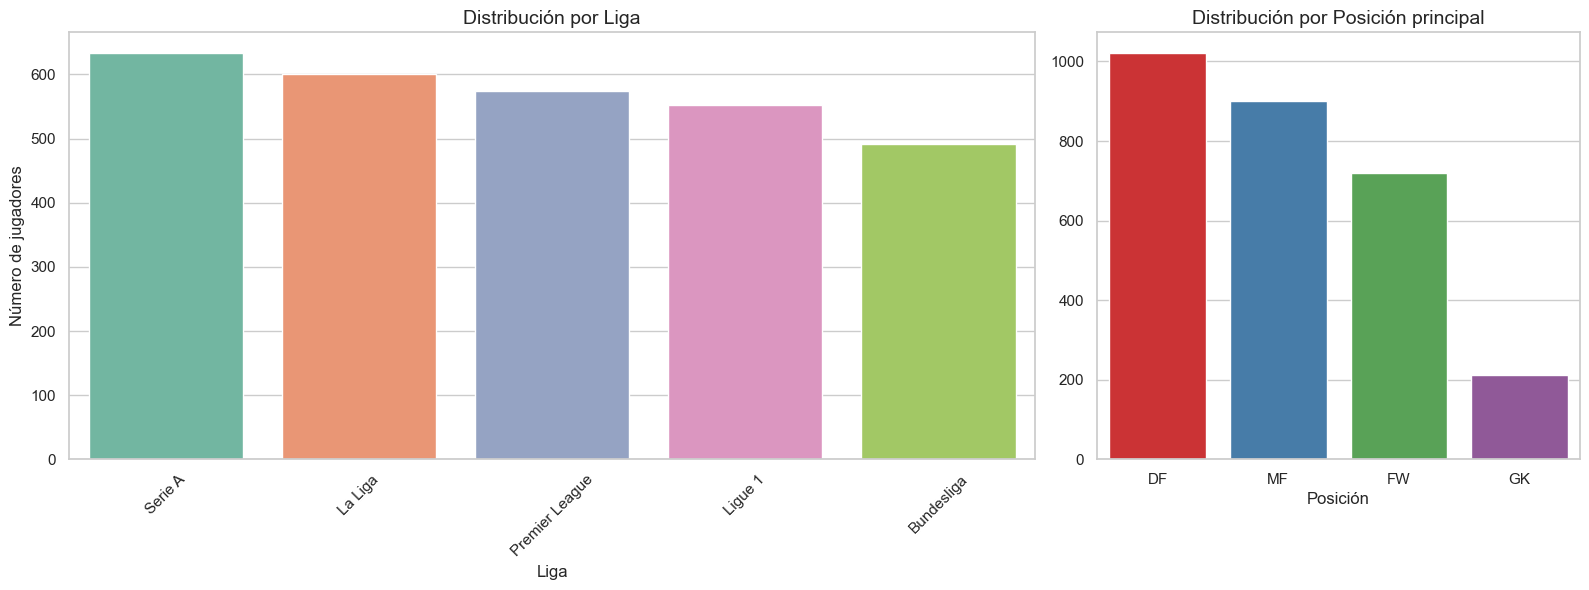

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Por Liga
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios':[2,1]})

sns.countplot(data=df_clean, x="Comp", order=df_clean['Comp'].value_counts().index, palette="Set2", ax=axes[0])
axes[0].set_title("Distribución por Liga", fontsize=14)
axes[0].set_xlabel("Liga", fontsize=12)
axes[0].set_ylabel("Número de jugadores")
axes[0].tick_params(axis='x', rotation=45)

# Por posición primaria
df_clean['Pos_Primary'] = df_clean['Pos'].str.split(',').str[0]
sns.countplot(data=df_clean, x="Pos_Primary", order=df_clean['Pos_Primary'].value_counts().index, palette="Set1", ax=axes[1])
axes[1].set_title("Distribución por Posición principal", fontsize=14)
axes[1].set_xlabel("Posición", fontsize=12)
axes[1].set_ylabel("")
plt.tight_layout()
plt.show()

---
## 📈 Resumen estadístico por posición

Calculamos y visualizamos las medias de variables clave para cada posición principal.
---


,Gls_per90,Ast_per90,G+A_per90,xG_per90,xAG_per90,PrgC,PrgP,PrgR
Pos_Primary,,,,,,,,
DF,0.04,0.05,0.09,0.05,0.06,18.95,52.76,33.24
FW,0.26,0.12,0.38,0.31,0.13,28.64,28.98,77.89
GK,0.00,0.01,0.01,0.00,0.00,0.02,0.59,0.00
MF,0.11,0.09,0.19,0.13,0.11,21.31,60.16,42.00


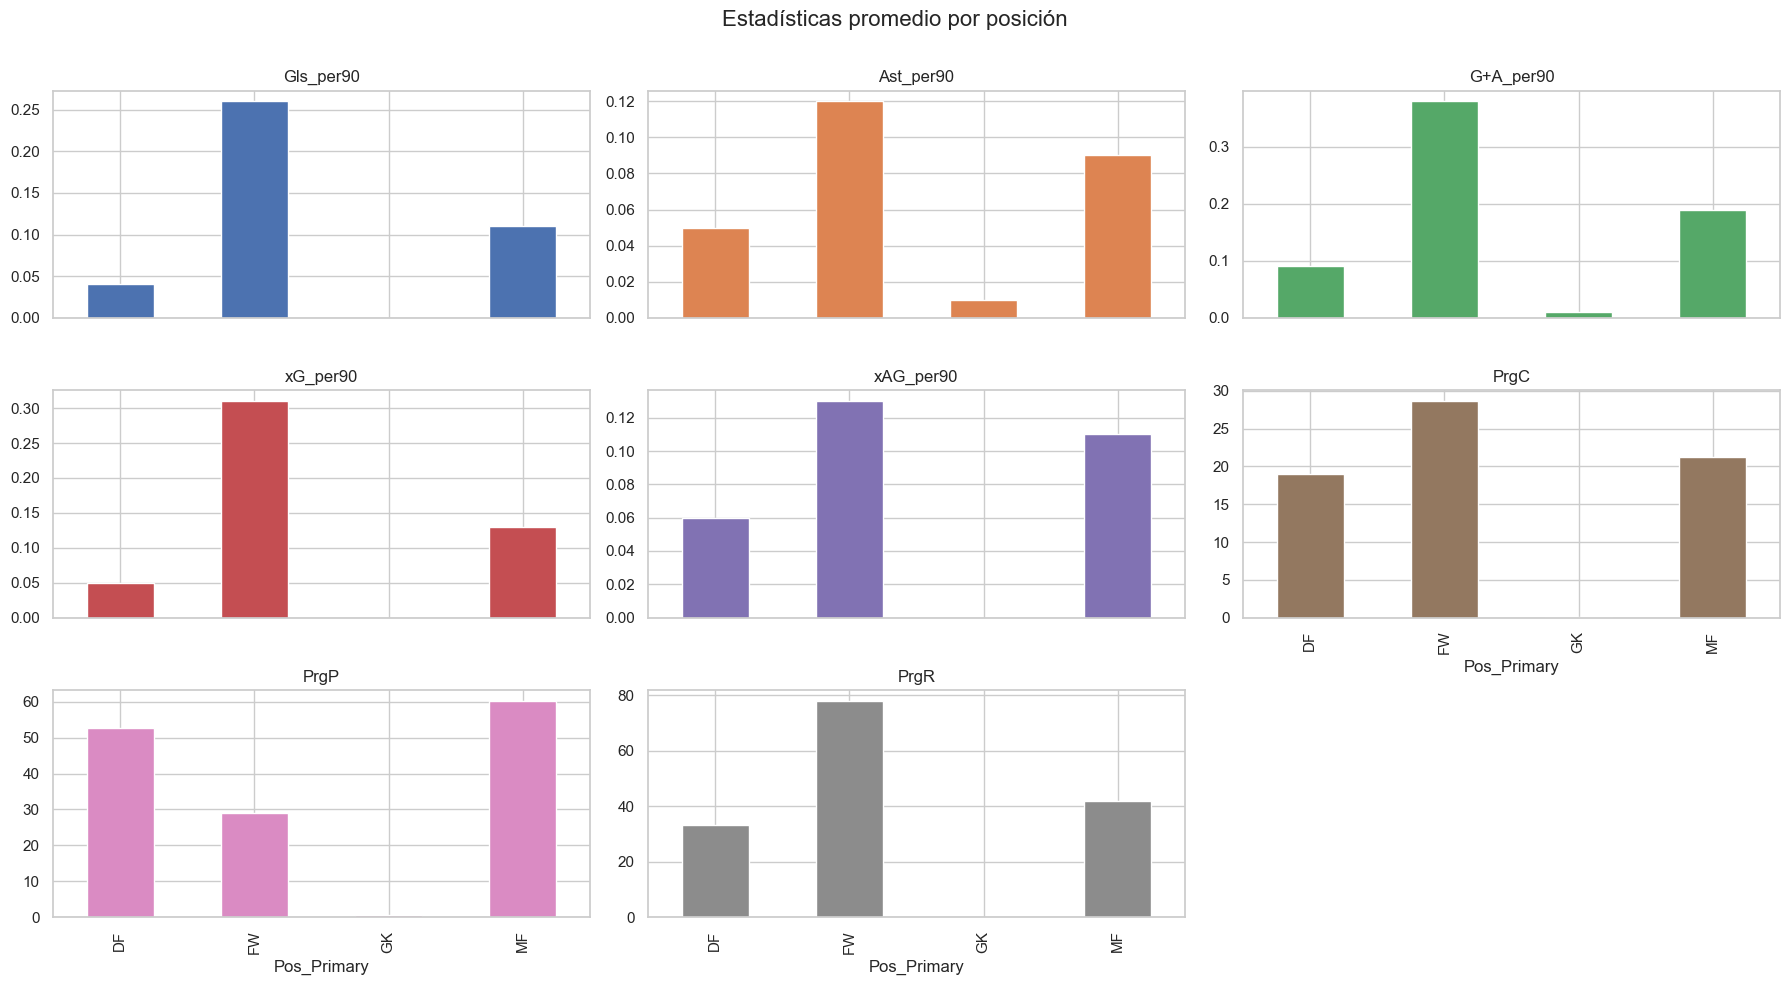

In [16]:
perfil_pos = df_clean.groupby('Pos_Primary')[['Gls_per90', 'Ast_per90', 'G+A_per90', 'xG_per90', 'xAG_per90', 'PrgC', 'PrgP', 'PrgR']].mean().round(2)
display(perfil_pos)

perfil_pos.plot(kind='bar', subplots=True, layout=(3,3), figsize=(18,10), legend=False, sharex=True)
plt.suptitle('Estadísticas promedio por posición', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

---
## 🥇 Top jugadores por métricas ofensivas y progresión

Vamos a mostrar el ranking de los 10 que más destacan en G+A per 90 min, asistencias y pases progresivos recibidos.
---

In [17]:
# Top 10 G+A per 90 (mínimo 5 partidos completos jugados)
df_top = df_clean[df_clean['90s'] >= 5]
print("Top 10 G+A per 90 (mínimo 5 partidos completos):")
print(df_top.nlargest(10, 'G+A_per90')[['Player','Squad','Comp','Pos','G+A_per90','Gls_per90','Ast_per90']])

# Top asistidores
print("\nTop 10 asistencias per 90:")
print(df_top.nlargest(10, 'Ast_per90')[['Player','Squad','Comp','Pos','Ast_per90','xAG_per90']])

# Top progresión ofensiva
print("\nTop 10 en progresión ofensiva (PrgR):")
print(df_top.nlargest(10, 'PrgR')[['Player','Squad','Comp','Pos','PrgR','PrgC']])

Top 10 G+A per 90 (mínimo 5 partidos completos):
                 Player            Squad            Comp    Pos  G+A_per90  \
1632      Omar Marmoush   Eint Frankfurt      Bundesliga     FW       1.49   
695     Ousmane Dembélé        Paris S-G         Ligue 1     FW       1.40   
1317         Harry Kane    Bayern Munich      Bundesliga     FW       1.32   
2612      Ferrán Torres        Barcelona         La Liga  FW,MF       1.30   
2539  Alexander Sørloth  Atlético Madrid         La Liga     FW       1.26   
2201      Mateo Retegui         Atalanta         Serie A     FW       1.25   
2304      Mohamed Salah        Liverpool  Premier League     FW       1.25   
1045       Amine Gouiri        Marseille         Ligue 1  FW,MF       1.12   
2369      Patrik Schick       Leverkusen      Bundesliga     FW       1.12   
327        Mika Biereth           Monaco         Ligue 1     FW       1.10   

      Gls_per90  Ast_per90  
1632       0.93       0.56  
695        1.09       0.31  
1317 

---
## 📉 Detección de outliers y diferencia entre Goles y xG

Calculamos los mayores "overperformers" y "underperformers": jugadores que más superan o más están por debajo de su xG.
---

In [18]:
# Excluye porteros y jugadores con pocos minutos
df_out = df_top[df_top['Pos_Primary'] != 'GK'].copy()
df_out['diff_xG'] = df_out['Gls_per90'] - df_out['xG_per90']

print("Top 10 overperformers (goles por encima de xG):")
print(df_out.nlargest(10, 'diff_xG')[['Player','Squad','Comp','diff_xG','Gls_per90','xG_per90']])

print("\nTop 10 underperformers (goles muy por debajo de xG):")
print(df_out.nsmallest(10, 'diff_xG')[['Player','Squad','Comp','diff_xG','Gls_per90','xG_per90']])

Top 10 overperformers (goles por encima de xG):
                   Player           Squad            Comp  diff_xG  Gls_per90  \
2369        Patrik Schick      Leverkusen      Bundesliga     0.44       1.12   
1632        Omar Marmoush  Eint Frankfurt      Bundesliga     0.38       0.93   
2062                Pedro           Lazio         Serie A     0.38       0.82   
2401       Ryan Sessegnon          Fulham  Premier League     0.37       0.62   
1389          Ismaël Koné          Rennes         Ligue 1     0.35       0.38   
796           Jáder Durán     Aston Villa  Premier League     0.30       0.99   
1689      Samuel Mbangula        Juventus         Serie A     0.30       0.38   
1746           Pere Milla        Espanyol         La Liga     0.30       0.59   
2089          Ayoze Pérez      Villarreal         La Liga     0.29       0.87   
2290  Alexis Saelemaekers            Roma         Serie A     0.29       0.45   

      xG_per90  
2369      0.68  
1632      0.55  
2062     

---
## ☁️ Matriz de correlación de variables ofensivas y progresivas

Visualizamos cómo se relacionan goles, asistencias, xG y stats avanzadas entre sí.
---

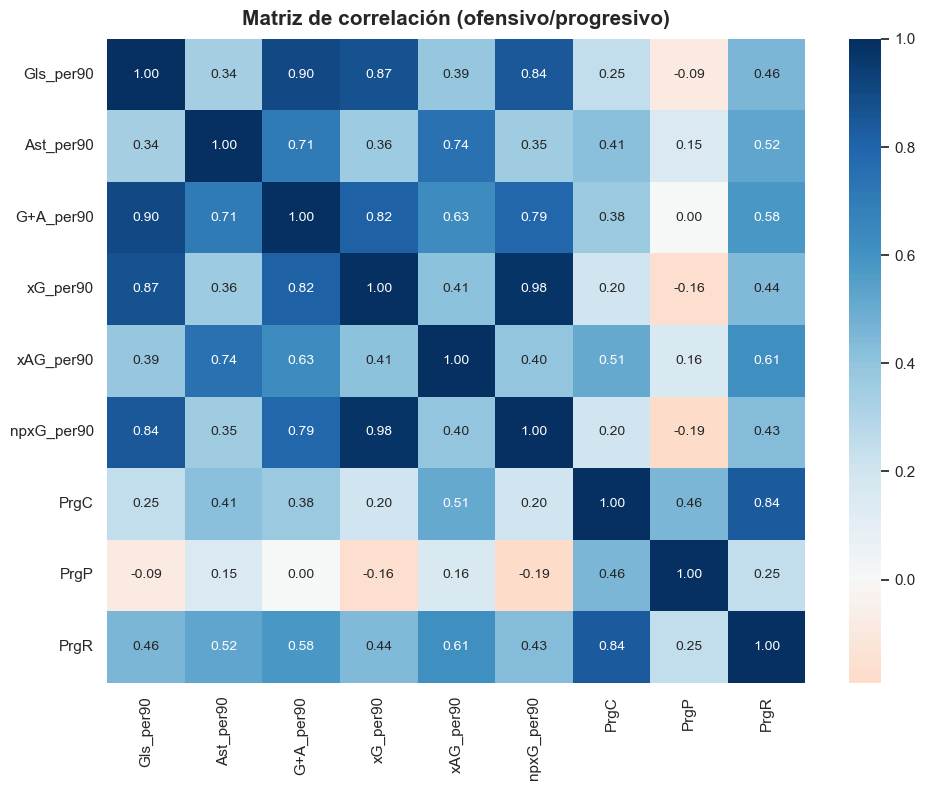

In [19]:
vars_corr = [
    'Gls_per90', 'Ast_per90', 'G+A_per90', 'xG_per90', 'xAG_per90', 'npxG_per90', 'PrgC', 'PrgP', 'PrgR'
]
corr_matrix = df_out[vars_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f")
plt.title("Matriz de correlación (ofensivo/progresivo)", fontsize=15, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()

---
## 🌐 Mapa de jugadores por perfil estadístico (PCA 2D)

Reducimos las principales features del juego ofensivo/progresivo a dos dimensiones mediante PCA para visualizar cómo se agrupan los estilos de los jugadores.
---

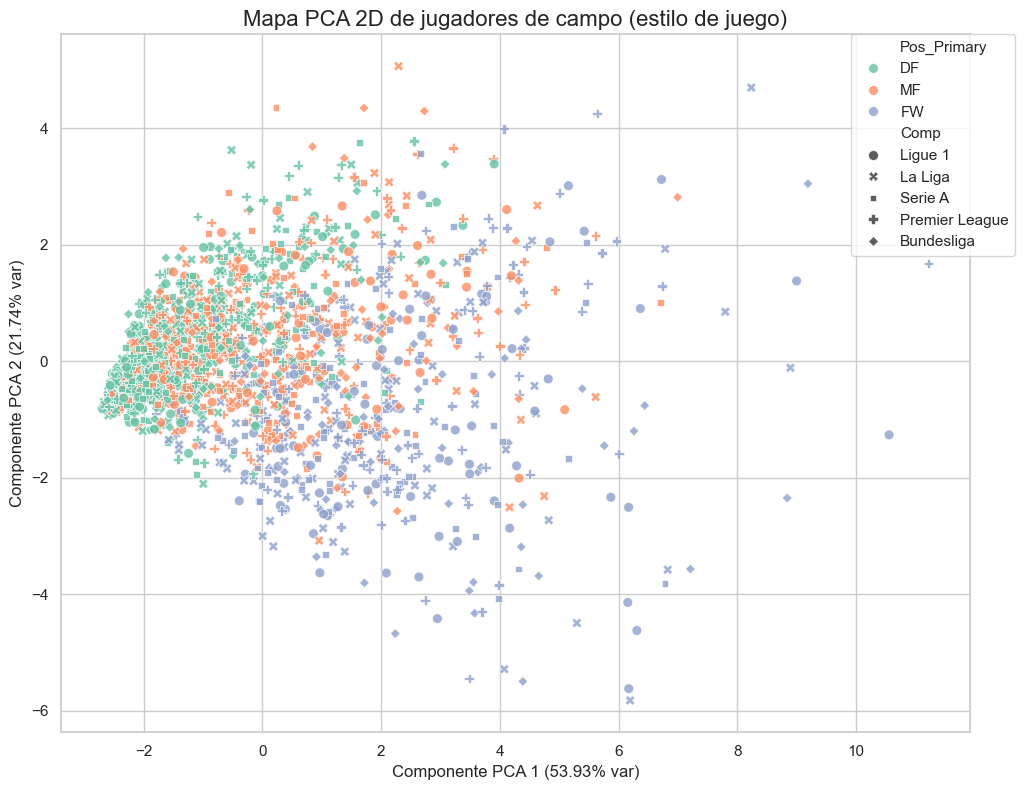

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Elige solo jugadores de campo y con suficientes minutos para mayor sentido visual
features_pca = ['Gls_per90', 'Ast_per90', 'G+A_per90', 'xG_per90',
                'xAG_per90', 'PrgC', 'PrgP', 'PrgR']
df_vis = df_clean[(df_clean['Pos_Primary'] != 'GK') & (df_clean['90s'] >= 5)].copy().dropna(subset=features_pca)

X_std = StandardScaler().fit_transform(df_vis[features_pca])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df_vis['PCA1'] = X_pca[:,0]
df_vis['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_vis, x='PCA1', y='PCA2', hue='Pos_Primary',
    style='Comp', palette="Set2", alpha=0.8, s=50, legend=True
)
plt.title("Mapa PCA 2D de jugadores de campo (estilo de juego)", fontsize=16)
plt.xlabel(f"Componente PCA 1 ({pca.explained_variance_ratio_[0]*100:.2f}% var)")
plt.ylabel(f"Componente PCA 2 ({pca.explained_variance_ratio_[1]*100:.2f}% var)")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0, title="")
plt.tight_layout()
plt.show()

---
## 🔥 Heatmap de impacto ofensivo por posición y liga

Mostramos cómo varía la producción ofensiva (G+A por 90) según cada combinación de **posición** y **competición**, lo que ayuda a identificar qué ligas o roles generan más impacto por minuto.
---


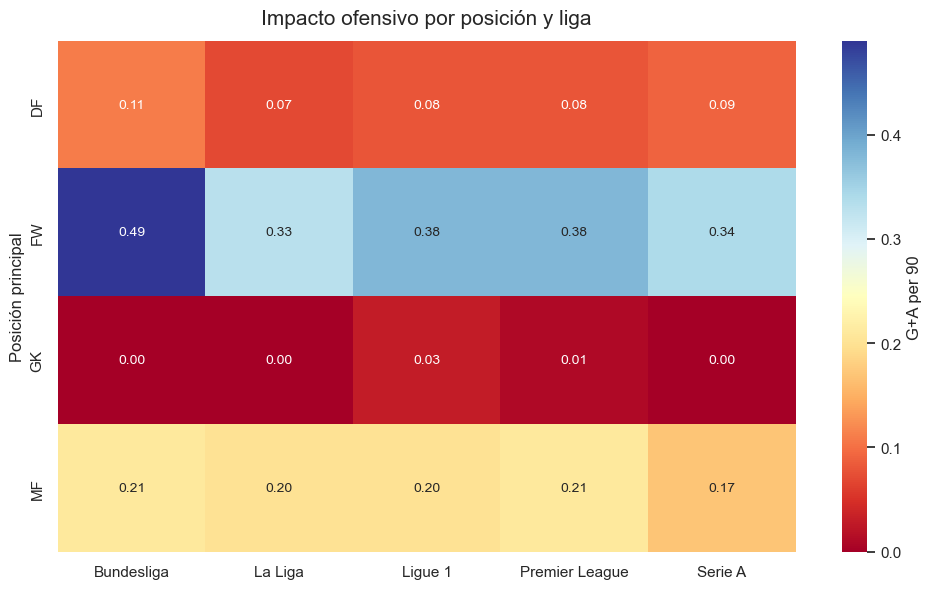

In [26]:
# Agrupar por posición y liga, calculando la media de G+A per 90
heat_data = (
    df_clean.groupby(['Pos_Primary', 'Comp'])['G+A_per90']
    .mean()
    .unstack()
    .round(2)
)

plt.figure(figsize=(10,6))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap='RdYlBu', cbar_kws={'label': 'G+A per 90'})
plt.title("Impacto ofensivo por posición y liga", fontsize=15, pad=12)
plt.xlabel("")
plt.ylabel("Posición principal")
plt.tight_layout()
plt.show()

---
## 🧭 Relación edad–impacto ofensivo

Visualizamos la relación entre la edad de los jugadores y su contribución de goles + asistencias (por 90 min), diferenciando por liga.
---

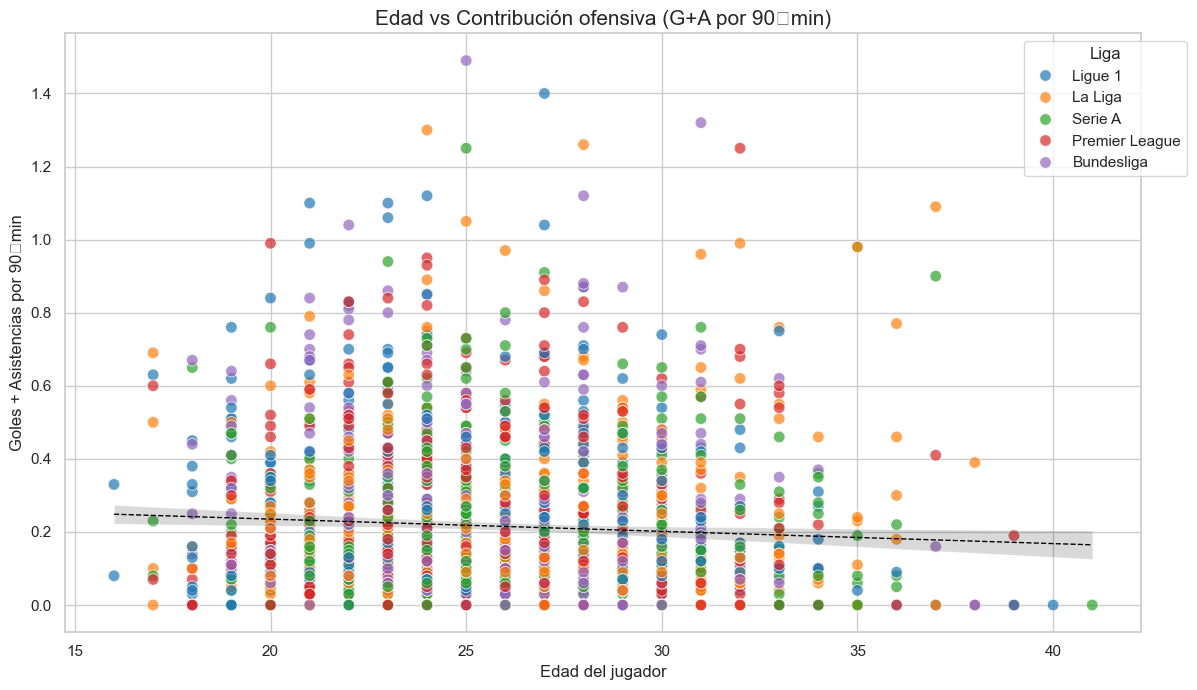

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df_clean[df_clean['90s'] > 5],
    x='Age', y='G+A_per90',
    hue='Comp', alpha=0.7, s=70, palette='tab10'
)
sns.regplot(
    data=df_clean[df_clean['90s'] > 5],
    x='Age', y='G+A_per90',
    scatter=False, color='black', line_kws={'lw':1, 'ls':'--'}
)
plt.title("Edad vs Contribución ofensiva (G+A por 90 min)", fontsize=15)
plt.xlabel("Edad del jugador")
plt.ylabel("Goles + Asistencias por 90 min")
plt.legend(title="Liga", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

---
## 🧠 Visualización interactiva: Top 10 dinámico de jugadores

Permite elegir cualquier métrica cuantitativa (por ejemplo, goles, asistencias, xG, progresión…)
y visualizar automáticamente los 10 mejores jugadores en esa categoría.
Una herramienta ideal de **scouting exploratorio** para descubrir patrones rápidamente.
---

In [30]:
from ipywidgets import interact, Dropdown
import ipywidgets as widgets

# Lista de métricas posibles
metrics = [
    'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgR',
    'Gls_per90', 'Ast_per90', 'G+A_per90', 'xG_per90', 'xAG_per90', 'PrgP', 'PrgC'
]

# Crear función de visualización dinámica
def top10_plot(metric='Gls_per90'):
    df = df_clean[df_clean['90s'] >= 5]  # Filtrar jugadores con minutos decentes

    # Ordenar y obtener top 10
    top = df.nlargest(10, metric)[['Player', 'Squad', 'Comp', 'Pos_Primary', metric]]
    plt.figure(figsize=(10,6))
    sns.barplot(data=top, x=metric, y='Player', hue='Comp', dodge=False, palette='tab10')
    plt.title(f"Top 10 jugadores por {metric}", fontsize=14)
    plt.xlabel(metric)
    plt.ylabel("")
    plt.legend(title="Liga", bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.tight_layout()
    plt.show()
    display(top.reset_index(drop=True))

# Widget interactivo
interact(
    top10_plot,
    metric=Dropdown(options=metrics, description='Métrica:', style={'description_width': 'initial'})
)

interactive(children=(Dropdown(description='Métrica:', options=('Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgR', 'Gls…

<function __main__.top10_plot(metric='Gls_per90')>

---
## 🏁 Conclusiones del EDA

✅ Dataset completamente limpio: sin duplicados ni valores extraños.
✅ 5 ligas unificadas, ~2700 jugadores analizados.
✅ Variables clave normalizadas por 90 min para comparaciones justas.
✅ Insights ofensivos, posicionales y de edad completamente visualizados.
✅ Módulos de radar + heatmaps + PCA + interactividad.

El dataset está **preparado para la fase de Clustering**, reducción PCA o modelos KNN de similitud.

🚀 Siguiente paso → `02_Feature_Engineering_&_Clustering.ipynb`

---